# 概論
手持ちのデータの全てを使って学習してはいけない（過学習）<br>
例えば半分くらいを学習に、半分をテストデータにする<br>

##### Hold Out
学習用データが十分にある場合には、それを学習用データと検証用データの2つに分けて、学習用データで学習し、検証用データでチューニングする

##### K クロスバリデーション(交差確認)
データが少ない場合は、できるだけ多くのデータを使って学習する。学習用データを例えばk個に分割して、k-1つを使い学習データとする<br>
それをk回繰り返す<br>

##### Leave One Out(LOO)
データが100個あった場合、1個だけをテストデータにする<br>
つまり、検証を100回繰り返す

##### 層化(Stratified)
クラス（分類）が２つあったときに、どうやって学習データとテストデータを分けるか？<br>
→学習データに片方のクラスが寄ってしまった場合学習が偏る<br>
→クラスのバランスを保ちながら、学習データとテストデータを作る

##### 検証データ
学習データをさらに検証データと分ける方法もある<br>
学習データと検証データでチューニングする<br>
→テストデータを使ってチューニングをしてはいけない

##### データ数
10個以内・・・機械学習は不要<br>
100個以内・・・性能は悪いがleave-one-out cross-validation (LOOCV，一個抜き交差検証)が可能<br>
1000個以内・・・まともな性能、10-foldCVで十分<br>
10000個以内・・・良い性能、K-fold CV Kは10以内<br>
10万個以内・・・実応用、Hold-out以外は無理。工夫が必要。<br>

# Hold-out

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer() #ガンのデータを読み出し

ガンデータをX（特徴）とｙ（結果）に分ける

In [2]:
X = data.data # 特徴
y = data.target # 分類

学習用とテスト用に分ける（偏らないようにランダムにした上で）

In [3]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.5, 
                  test_size=0.5)

In [4]:
train_index, test_index = next(ss.split(X, y))

ロジスティクス回帰で学習

In [5]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [6]:
clf.fit(X[train_index], y[train_index]);

精度を確認

In [7]:
clf.score(X[test_index], y[test_index])

0.96140350877192982

# データが多すぎると処理が終わらない（数万個レベル？）
詳細は省略

# 結果のばらつきを見るため、複数回 2-Hold-out-CVを繰り返す

In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer

データの準備

In [15]:
data = load_breast_cancer()
X = data.data
y = data.target

データを分ける（学習用とテスト用に）

In [18]:
from sklearn.model_selection import ShuffleSplit
# シャッフル
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.5, 
                  test_size=0.5)

In [19]:
train_index, test_index = next(ss.split(X, y))

In [20]:
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [21]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [22]:
clf.fit(X_train, y_train);

In [23]:
clf.score(X_test, y_test)

0.94736842105263153

複数回繰り返す

In [24]:
ss = ShuffleSplit(n_splits=10, #10回繰り返す
                  train_size=0.5, 
                  test_size=0.5)

for train_index, test_index in ss.split(X, y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.929824561404
0.957894736842
0.947368421053
0.936842105263
0.971929824561
0.922807017544
0.961403508772
0.940350877193
0.950877192982
0.950877192982


##### 学習用とテスト用で、分類の比率を維持するためにはStratifiedを使う

In [ ]:
# これでは比率が偏る可能性がある
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.95, 
                  test_size=0.05, 
                  random_state=3)

In [ ]:
# こうすれば比率が維持できる
ss = StratifiedShuffleSplit(n_splits=1, 
                            train_size=0.95, 
                            test_size=0.05, 
                            random_state=0)

# Cross Validation

In [17]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

In [18]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

KFold(Holdではない)を使い、学習データを１０個に分割して、クロスバリデーションを行う

In [25]:
from sklearn.model_selection import KFold
ss = KFold(n_splits=10, shuffle=True)

In [26]:
for train_index, test_index in ss.split(X, y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.912280701754
0.964912280702
0.912280701754
0.929824561404
1.0
0.947368421053
0.982456140351
0.982456140351
0.964912280702
0.928571428571


##### 正解のデータの分類ごとの比率について
こちらについても、Stratifiedを使うことによって目的変数の分類ごとの比率を保つことができる（以下の例は、Stratifiedでもわりとうまく分類できてしまっている）

In [27]:
ss = KFold(n_splits=10, shuffle=True)

for train_index, test_index in ss.split(X, y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print(np.unique(y_train, return_counts=True)[1] / y_train.size, y_train.size, 
          np.unique(y_test,  return_counts=True)[1] / y_test.size,  y_test.size)

[ 0.36914062  0.63085938] 512 [ 0.40350877  0.59649123] 57
[ 0.36523438  0.63476562] 512 [ 0.43859649  0.56140351] 57
[ 0.36914062  0.63085938] 512 [ 0.40350877  0.59649123] 57
[ 0.36523438  0.63476562] 512 [ 0.43859649  0.56140351] 57
[ 0.36328125  0.63671875] 512 [ 0.45614035  0.54385965] 57
[ 0.3828125  0.6171875] 512 [ 0.28070175  0.71929825] 57
[ 0.375  0.625] 512 [ 0.35087719  0.64912281] 57
[ 0.38671875  0.61328125] 512 [ 0.24561404  0.75438596] 57
[ 0.37695312  0.62304688] 512 [ 0.33333333  0.66666667] 57
[ 0.37231969  0.62768031] 513 [ 0.375  0.625] 56


In [28]:
from sklearn.model_selection import StratifiedKFold
ss = StratifiedKFold(n_splits=10, shuffle=True)

for train_index, test_index in ss.split(X, y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print(np.unique(y_train, return_counts=True)[1] / y_train.size, y_train.size, 
          np.unique(y_test,  return_counts=True)[1] / y_test.size,  y_test.size)

[ 0.37181996  0.62818004] 511 [ 0.37931034  0.62068966] 58
[ 0.37181996  0.62818004] 511 [ 0.37931034  0.62068966] 58
[ 0.37304688  0.62695312] 512 [ 0.36842105  0.63157895] 57
[ 0.37304688  0.62695312] 512 [ 0.36842105  0.63157895] 57
[ 0.37304688  0.62695312] 512 [ 0.36842105  0.63157895] 57
[ 0.37304688  0.62695312] 512 [ 0.36842105  0.63157895] 57
[ 0.37304688  0.62695312] 512 [ 0.36842105  0.63157895] 57
[ 0.37231969  0.62768031] 513 [ 0.375  0.625] 56
[ 0.37231969  0.62768031] 513 [ 0.375  0.625] 56
[ 0.37231969  0.62768031] 513 [ 0.375  0.625] 56


##### クロスバリデーションの簡単な実行（実態はStratifiedKFold)

In [29]:
from sklearn.model_selection import cross_val_score
ave_score = cross_val_score(clf, 
                            X, y, 
                            cv=10) # StratifiedKFold

In [30]:
print("{0:4.2f} +/- {1:4.2f} %".format(ave_score.mean() * 100, ave_score.std() * 100))

95.09 +/- 1.85 %


In [31]:
ave_score

array([ 0.94827586,  0.9137931 ,  0.92982456,  0.94736842,  0.96491228,
        0.98245614,  0.94736842,  0.94642857,  0.96428571,  0.96428571])

# Leave One Out

In [32]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

In [33]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

leave one outオブジェクト作成

In [34]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()

Looを使うことでテスト用を１つだけ取り出すことができる

In [35]:
train_index, test_index = next(loocv.split(X, y))

In [36]:
y.size, train_index.size, test_index.size

(569, 568, 1)

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, 
                         X, y, 
                         cv=loocv)

In [42]:
scores.mean()*100, scores.std()*100, scores.size

(95.079086115992979, 21.630441395100792, 569)

##### leave p out(複数抜き出す)
任意の２つを抜き出すため、処理が終わらない

##### leave one group out
特定のグループを外して残りのグループでやる

In [34]:
# 擬似的にグループを作る
group = np.array(list(range(50))*12)
group = np.sort(group[:y.size])
group.size
group

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [35]:
from sklearn.model_selection import LeaveOneGroupOut
loocv = LeaveOneGroupOut()

# 引数にgroupが追加されている
for train_index, test_index in loocv.split(X, y, group):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.916666666667
0.916666666667
1.0
0.583333333333
1.0
1.0
0.916666666667
0.75
1.0
1.0
1.0
0.916666666667
0.916666666667
0.916666666667
1.0
1.0
0.916666666667
0.916666666667
1.0
0.909090909091
1.0
0.909090909091
1.0
1.0
0.909090909091
0.909090909091
1.0
1.0
1.0
0.909090909091
1.0
1.0
1.0
0.909090909091
1.0
0.909090909091
1.0
1.0
1.0
0.909090909091
0.909090909091
0.909090909091
0.909090909091
1.0
1.0
1.0
1.0
0.818181818182
1.0
1.0


In [36]:
# これもcross validationで一発でできる
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, 
                         X, y, 
                         groups=group, 
                         cv=loocv) # LeaveOneGroupOut

In [37]:
scores.mean(), scores.std(), scores.size

(0.94969696969696971, 0.076041286934407912, 50)

# 学習データ・検証データとテストデータ
学習データの中で、検証データを学習データを分ける

In [38]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

In [39]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [40]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [41]:
from sklearn.model_selection import cross_val_score
# 全体ではなく訓練データを10分割する
scores = cross_val_score(clf, 
                         X_train, y_train, 
                         cv=10) # StratifiedKFold

In [42]:
scores.mean()

0.94734299516908216

ここからパラメータを色々変更して最適な結果を目指す（テストデータはまだとっておく）

In [43]:
# パラメータCを調整する
C_range_exp = np.linspace(start=-15, stop=20, num=36)
C_range = 10 ** C_range_exp
print(C_range)

[  1.00000000e-15   1.00000000e-14   1.00000000e-13   1.00000000e-12
   1.00000000e-11   1.00000000e-10   1.00000000e-09   1.00000000e-08
   1.00000000e-07   1.00000000e-06   1.00000000e-05   1.00000000e-04
   1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
   1.00000000e+01   1.00000000e+02   1.00000000e+03   1.00000000e+04
   1.00000000e+05   1.00000000e+06   1.00000000e+07   1.00000000e+08
   1.00000000e+09   1.00000000e+10   1.00000000e+11   1.00000000e+12
   1.00000000e+13   1.00000000e+14   1.00000000e+15   1.00000000e+16
   1.00000000e+17   1.00000000e+18   1.00000000e+19   1.00000000e+20]


In [44]:
# それぞれを繰り返す
all_scores_mean = []
all_scores_std  = []

for C in C_range:
    clf.C = C
    scores = cross_val_score(clf, 
                             X_train, y_train,
                             cv=10) # StratifiedKFold
    
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())

In [45]:
all_scores_mean = np.array(all_scores_mean)
all_scores_std  = np.array(all_scores_std)

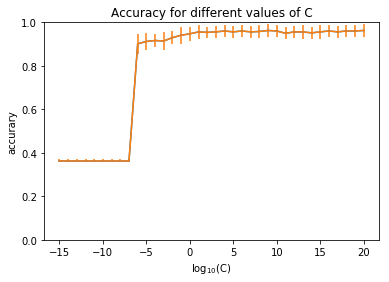

In [47]:
# 結果をプロットする
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(C_range_exp, all_scores_mean)

plt.errorbar(C_range_exp, 
             all_scores_mean, 
             yerr=all_scores_std)

plt.ylim(0,1)
plt.ylabel('accurary')
plt.xlabel('$\log_{10}$(C)')
plt.title('Accuracy for different values of C')

In [48]:
# 一番結果の良かったCは
all_scores_mean.max()

0.96270531400966186

In [49]:
max_index = np.argmax(all_scores_mean)

In [50]:
C_range_exp[max_index]

20.0

In [51]:
clf.C = 10 ** C_range_exp[max_index]

In [52]:
# 今回のパラメータを追加して再度やってみる
clf.fit(X_train, y_train)

LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
clf.score(X_test, y_test)

0.98245614035087714

In [54]:
# 最終的にテストデータを使って確認
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296